Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



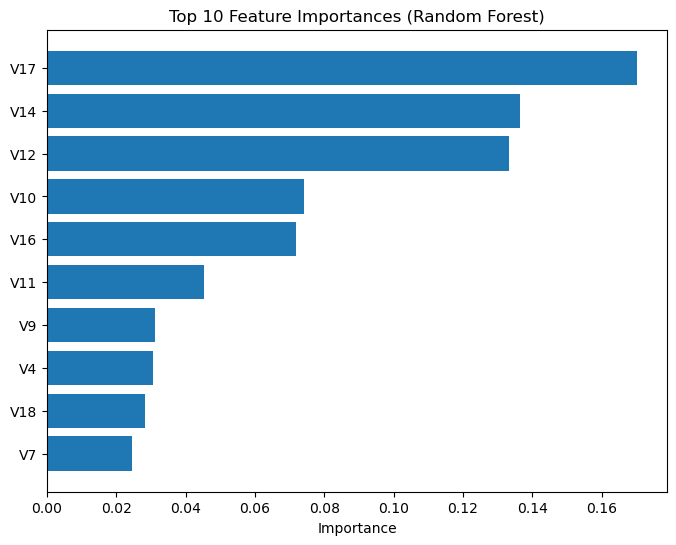

['random_forest_fraud_model.pkl']

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import joblib



df = pd.read_csv("creditcard.csv")

'''print(df.head())
print(df.info())
print(df['Class'].value_counts())'''

x = df.drop('Class',axis = 1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,stratify=y,random_state=42)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lr = LogisticRegression(max_iter = 500,solver = 'lbfgs',n_jobs = -1)
lr.fit(x_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
rf.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test_scaled)
y_pred_rf = rf.predict(x_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), x.columns[indices])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

joblib.dump(rf, "random_forest_fraud_model.pkl")
